# Definition
**Linear regression** is a **supervised learining** algorithm used when target / dependent variable  **continues** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line.   It work on the principle of ordinary least square $(OLS)$ / Mean square errror $(MSE)$. In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.

## Hypothesis representation

We will use $\mathbf{x_i}$ to denote the independent variable and $\mathbf{y_i}$ to denote dependent variable. A pair of $\mathbf{(x_i,y_i)}$ is called training example. The subscripe $\mathbf{i}$ in the notation is simply index into the training set. We have $\mathbf{m}$ training example then $\mathbf{i = 1,2,3,...m}$.

The goal of supervised learning is to learn a *hypothesis function $\mathbf{h}$*, for a given training set that can used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So hypothesis fuction represented as 
>
>$$\mathbf{ h_\theta(x_{i}) = \theta_0 + \theta_1x_i }$$   

$\mathbf{\theta_0,\theta_1}$ are parameter of hypothesis.This is equation for **Simple / Univariate Linear regression**. 

For **Multiple Linear regression** more than one independent variable exit then we will use $\mathbf{x_{ij}}$ to denote indepedent variable and $\mathbf{y_{i}}$ to denote dependent variable. We have $\mathbf{n}$ independent variable then $\mathbf{j=1,2,3 ..... n}$. The hypothesis function represented as
>
>$$\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$


Simple linear regression uses the following null and alternative hypotheses:

>$$\mathbf{H\theta: \beta = 0}$$

>$$\mathbf{HA: \beta <> 0}$$

The null hypothesis states that the **coefficient β is equal to zero**. In other words, there is no statistically significant relationship between the predictor variable, x, and the response variable, y.

The alternative hypothesis states that **coefficient β is not equal to zero**. In other words, there is a statistically significant relationship between x and y.

**Three different approaches to find the optimized values for the model parameters.**

- Linear Regression with the Normal Equation
- Linear Regression with Gradient Descent
- Linear Regression with the Scikit-learn LinearRegression estimator

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [2]:
n_samples = 500
 
# Create data set.
X, y = make_regression(
    n_samples=n_samples, 
    n_features=1, 
    n_informative=1, 
    noise = 10, 
    random_state=10)
 
# Convert  target variable array from 1d to 2d.
y = y.reshape(n_samples, 1)

In [3]:
X.shape, y.shape

((500, 1), (500, 1))

# Linear Regression with Normal equation.

Usually finding the best model parameters is performed by running some kind of optimization algorithm (e.g. gradient descent) to minimize a cost function. However, it is possible to obtain values (weights) of these parameters by solving an algebraic equation called the normal equation as well.

Linear regression has closed-form solution, we can solve it analytically and it is called normal equation. It is given by the formula below. However, we need to calcuate  $(X^T X)^{−1}$ , which make it slow if the number of records is very large.

>$\mathbf{\theta = (X^T X)^{-1} X^Ty}$

[Read more](https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57)

if you think you need to refresh your [linear algebra skills](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

In [4]:
import numpy as np

def linear_regression_normal_equation(X, y):
    ones = np.ones((X.shape[0], 1))
    X = np.append(ones, X, axis=1)
    W = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return W

if __name__ == "__main__":
    W = linear_regression_normal_equation(X, y)

In [5]:
W

array([[-0.46338273],
       [63.13879112]])

# Linear regression with gradient decent

Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function

## Cost function

A cost function measures how much error in the model is in terms of ability to estimate the relationship between $x$ and $y$. 
We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of observed dependent variable in the given the dataset and those predicted by the hypothesis function.
 
>$$\mathbf{J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
>$$\mathbf{J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2}$$

In [6]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, total_iterations=1000, print_cost=False):
        self.learning_rate = learning_rate
        self.total_iterations = total_iterations
        self.print_cost = print_cost

    def y_hat(self, X, w):
        return np.dot(w.T, X)

    def cost(self, yhat, y):
        C = 1 / self.m * np.sum(np.power(yhat - y, 2))

        return C

    def gradient_descent(self, w, X, y, yhat):
        dCdW = 2 / self.m * np.dot(X, (yhat - y).T)
        w = w - self.learning_rate * dCdW

        return w
    
    def main(self, X, y):
        # Add x1 = 1
        ones = np.ones((1, X.shape[1]))
        X = np.append(ones, X, axis=0)

        self.m = X.shape[1]
        self.n = X.shape[0]

        w = np.zeros((self.n, 1))
        costs = []
        
        for it in range(1, self.total_iterations + 1):
            yhat = self.y_hat(X, w)
            cost = self.cost(yhat, y)
            # append to list
            costs.append(cost)
            
            if it % 50 == 0 and self.print_cost:
                print(f"Cost at iteration {it} is {cost}")

            w = self.gradient_descent(w, X, y, yhat)

        return w, costs

In [7]:
total_iterations = 500
regression = LinearRegression(total_iterations=total_iterations, print_cost=False)

w, costs = regression.main(X.T, y)

In [8]:
W

array([[-0.46338273],
       [63.13879112]])

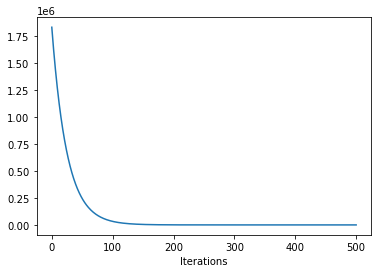

In [9]:
iterations = np.linspace(0, total_iterations, num=total_iterations)

plt.plot(iterations, costs)
plt.xlabel('Iterations');

# Linear Regression with Sklearn

In [10]:
from sklearn.linear_model import LinearRegression
# Create a linear regression model based the positioning of the data and Intercept, and predict a Best Fit:
model = LinearRegression().fit(X, y)

In [11]:
model.intercept_, model.coef_

(array([-0.46338273]), array([[63.13879112]]))

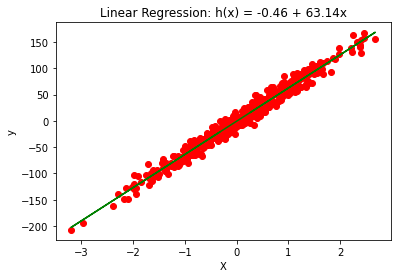

In [12]:
plt.scatter(X, y, color = "red")
plt.plot(X, model.predict(X), color = "green")
plt.title('Linear Regression: h(x) = %0.2f + %0.2fx'%(model.intercept_, model.coef_))
plt.xlabel("X")
plt.ylabel("y")
plt.show()

**Important terms in Linear regression-**

- **Best Fit** – the straight line in a plot that minimizes the deviation between related scattered data points.
- **Coefficient** – also known as a parameter, is the factor a variable is multiplied by. In linear regression, a coefficient represents changes in a Response Variable (see below).
- **Coefficient of Determination** – the correlation coefficient denoted as 𝑅². Used to describe the precision or degree of fit in a regression. 
- **Correlation** – the relationship between two variables in terms of quantifiable strength and degree, often referred to as the ‘degree of correlation’.  Values range between -1.0 and 1.0. 
- **Dependent Feature** – a variable denoted as y in the slope equation y=ax+b. Also known as an Output, or a Response. 
- **Estimated Regression Line** – the straight line that best fits a set of scattered data points.
- **Independent Feature** – a variable denoted as x in the slope equation y=ax+b. Also known as an Input, or a predictor. 
- **Intercept** – the location where the Slope intercepts the Y-axis denoted b in the slope equation y=ax+b. 
- **Mean** – an average of a set of numbers, but in linear regression, Mean is modeled by a linear function.
- **Ordinary Least Squares Regression (OLS)** – more commonly known as Linear Regression. 
- **Residual** – vertical distance between a data point and the line of regression (see Residual in Figure 1 below).
- **Regression** – estimate of predictive change in a variable in relation to changes in other variables (see Predicted Response in Figure 1 below).
- **Regression Model** – the ideal formula for approximating a regression.
- **Response Variables** – includes both the Predicted Response (the value predicted by the regression) and the Actual Response, which is the actual value of the data point (see Figure 1 below).
- **Slope** – the steepness of a line of regression. Slope and Intercept can be used to define the linear relationship between two variables: y=ax+b.
- **Simple Linear Regression** – a linear regression that has a single independent variable.

# Reference

https://jermwatt.github.io/machine_learning_refined/notes/5_Linear_regression/5_2_Least.html